<b style = 'color:red'>Read <a href = 'https://ggplot2.tidyverse.org/reference/position_stack.html'>Documentation</a> for comprehensive example</a></b>

In [2]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

<img src = './ggplot2_position_adjustment.png'/>

# Stack overlapping objects on top of each another

**`position_stack()`** stacks bars on top of each other  
**`position_fill()`** stacks bars and standardises each stack to have constant height.

```R
position_stack(vjust = 1, reverse = FALSE)

position_fill(vjust = 1, reverse = FALSE)
```

**Arguments**  
`vjust`	
Vertical adjustment for geoms that have a position (like points or lines), not a dimension (like bars or areas). Set to 0 to align with the bottom, 0.5 for the middle, and 1 (the default) for the top.

`reverse`	
If TRUE, will reverse the default stacking order. This is useful if you're rotating both the plot and legend.

**Details**  
`position_fill()` and `position_stack()` automatically stack values in reverse order of the group aesthetic, which for bar charts is usually defined by the fill aesthetic (the default group aesthetic is formed by the combination of all discrete aesthetics except for x and y). This default ensures that bar colours align with the default legend.

There are three ways to override the defaults depending on what you want:

Change the order of the levels in the underlying factor. This will change the stacking order, and the order of keys in the legend.

Set the legend breaks to change the order of the keys without affecting the stacking.

Manually set the group aesthetic to change the stacking order without affecting the legend.

Stacking of positive and negative values are performed separately so that positive values stack upwards from the x-axis and negative values stack downward.

<hr>

In [7]:
setwd('C:/Users/dell/PycharmProjects/MachineLearning/Pandas/datasets')
getwd()

[1] "C:/Users/dell/PycharmProjects/MachineLearning/Pandas/datasets"

In [8]:
titanic <- read.csv('./titanic.csv')
head(titanic)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


<hr>

**stack** vs **fill**

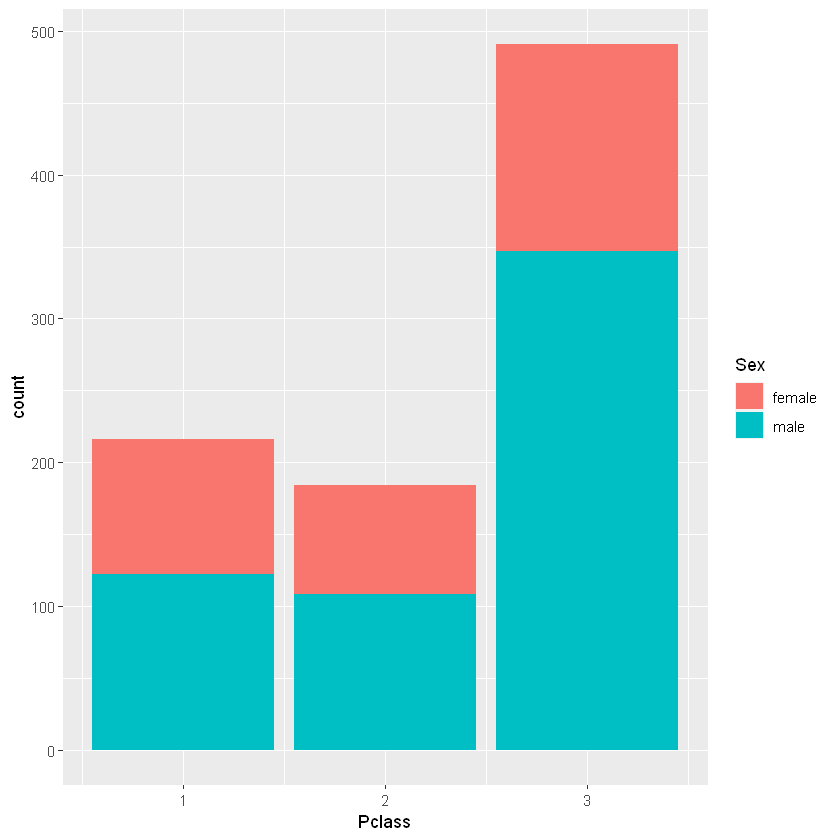

In [9]:
#stack: Number of males and females in each Pclass
ggplot(titanic, aes(Pclass, fill = Sex)) +
geom_bar(position = 'stack') #default

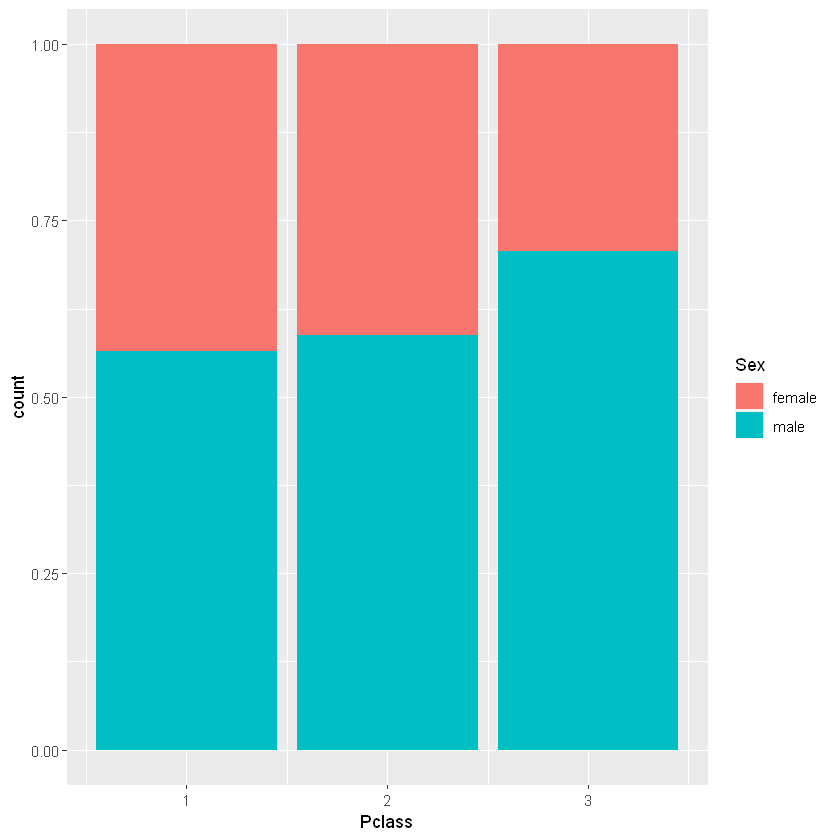

In [10]:
#using position_fill() for comparing proportion
ggplot(titanic, aes(Pclass, fill = Sex)) + 
geom_bar(position = 'fill')

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


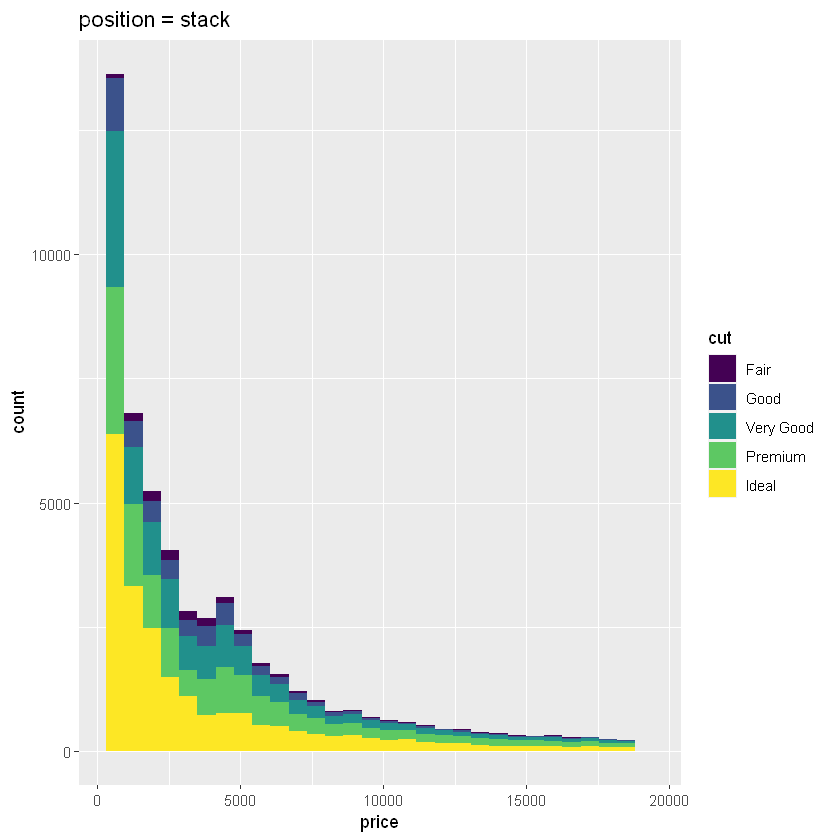

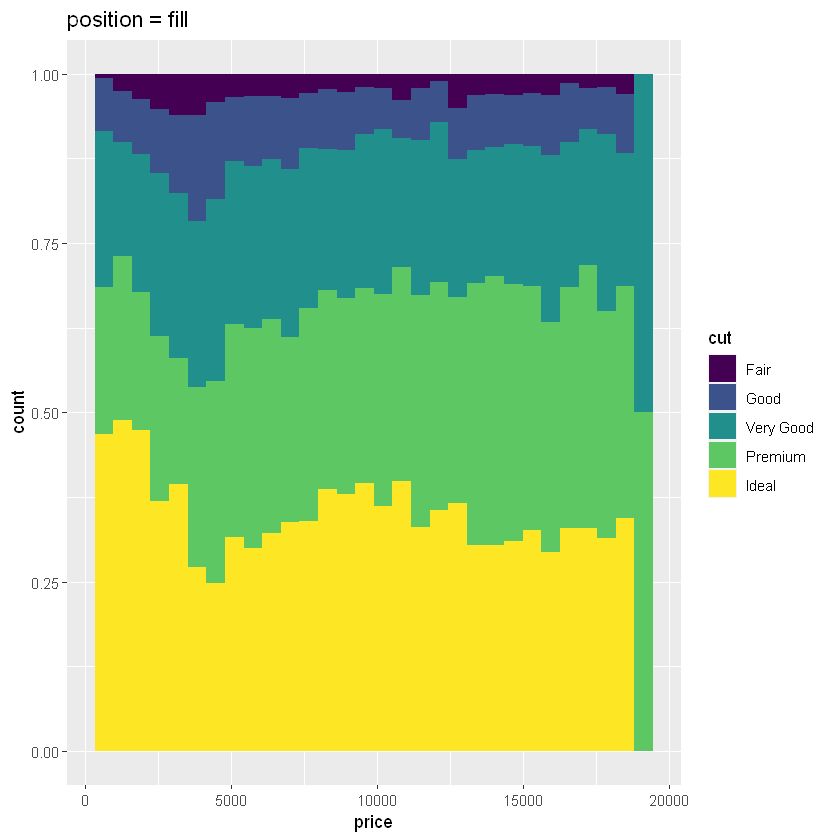

In [12]:
fig <- ggplot(diamonds, aes(price, fill = cut))

fig + geom_histogram(position = 'stack') + labs(title = 'position = stack')
fig +geom_histogram(position = 'fill') + labs(title = 'position = fill')

<hr>

# controling stacking order

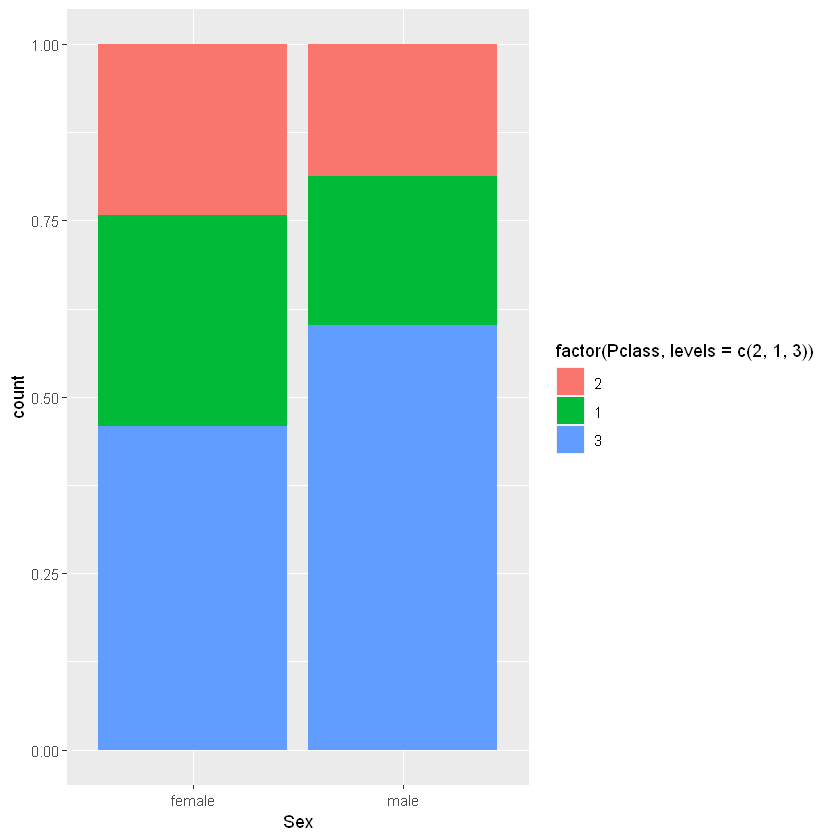

In [14]:
#changing the order in factor
ggplot(titanic, aes(Sex, fill = factor(Pclass, levels = c(2,1,3)))) +
geom_bar(position = 'fill')

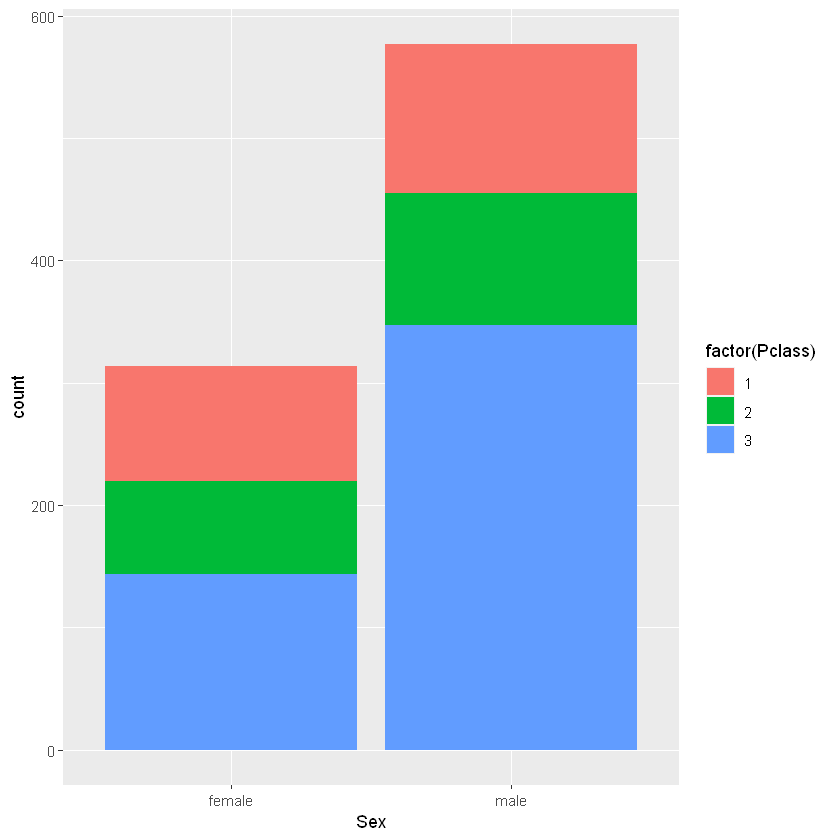

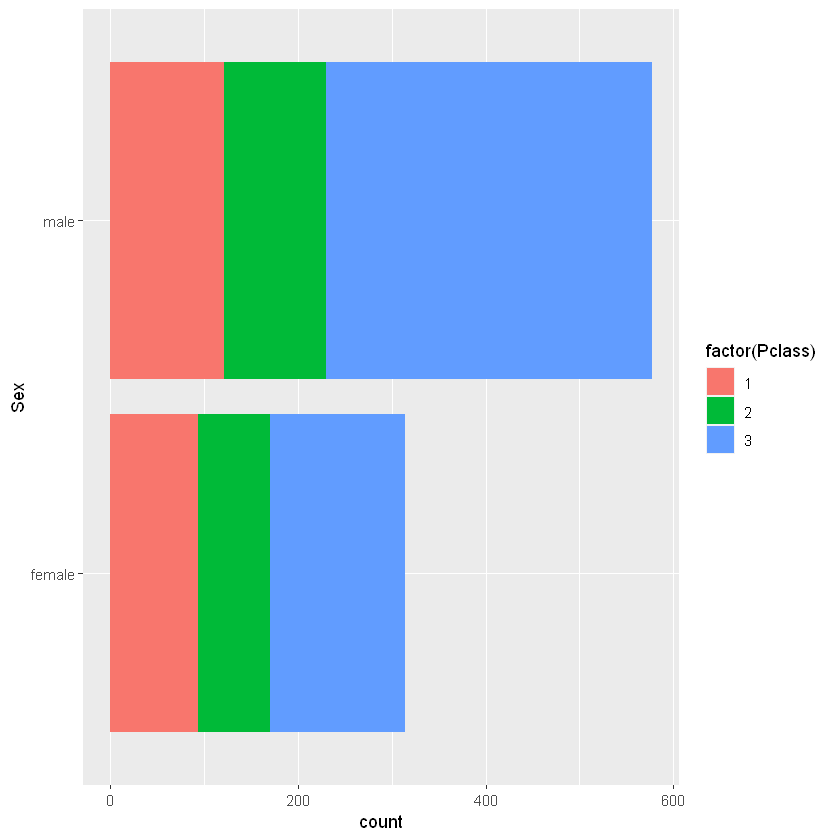

In [22]:
ggplot(titanic, aes(Sex, fill = factor(Pclass))) +
geom_bar(position = position_stack())
# If you've flipped the plot, use reverse = TRUE so the levels
# continue to match
ggplot(titanic, aes(Sex, fill = factor(Pclass))) +
geom_bar(position = position_stack(reverse = TRUE)) +
coord_flip()

<hr>

In [23]:
series <- data.frame(
  time = c(rep(1, 4),rep(2, 4), rep(3, 4), rep(4, 4)),
  type = rep(c('a', 'b', 'c', 'd'), 4),
  value = rpois(16, 10)
)
series

time,type,value
1,a,11
1,b,8
1,c,12
1,d,11
2,a,6
2,b,9
2,c,5
2,d,6
3,a,8
3,b,10


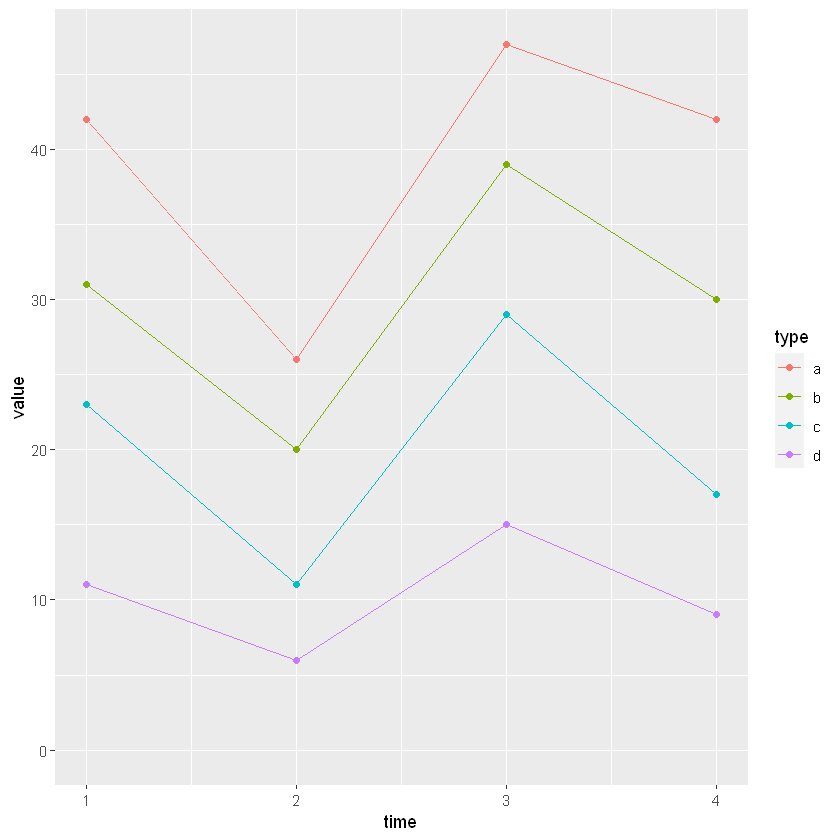

In [30]:

# When stacking across multiple layers it's a good idea to always set
# the `group` aesthetic in the ggplot() call. This ensures that all layers
# are stacked in the same way.

ggplot(series, aes(time, value, group = type)) +
geom_line(aes(color = type), position = 'stack') +
geom_point(aes(color = type), position = 'stack')

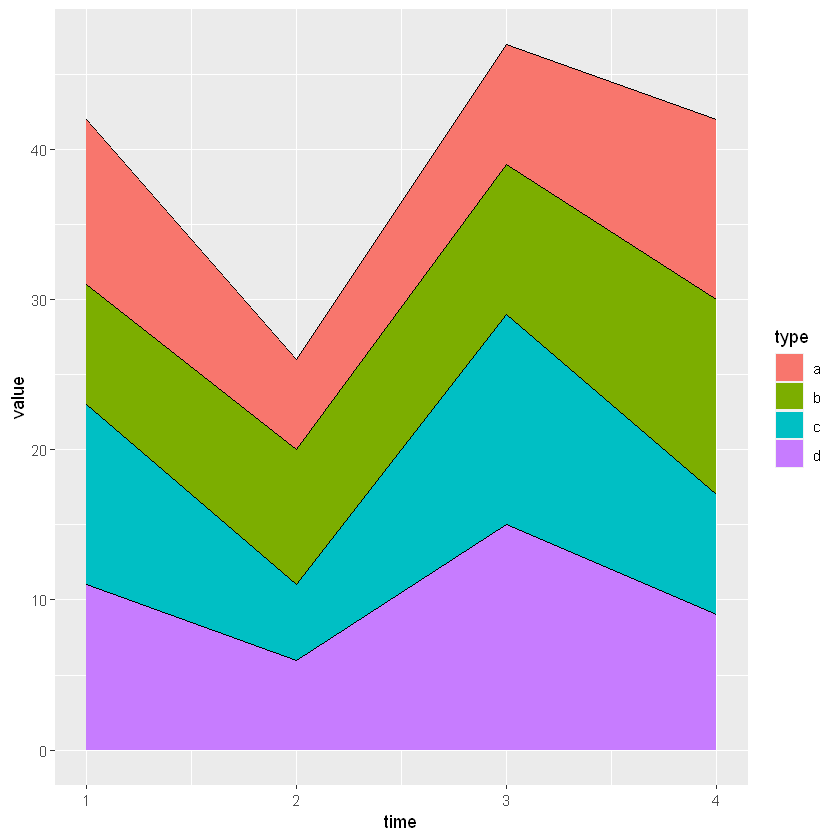

In [31]:
ggplot(series, aes(time, value, group = type)) +
  geom_area(aes(fill = type)) +
  geom_line(aes(group = type), position = "stack")

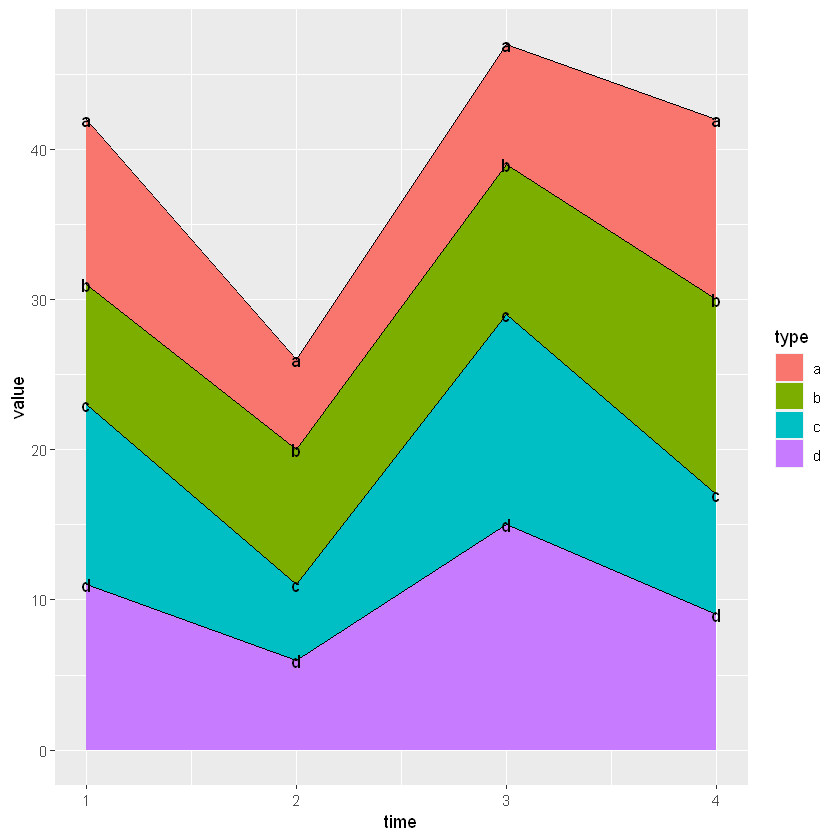

In [36]:
#You can also stack labels, but the default position is suboptimal.
ggplot(series, aes(time, value, group = type)) +
geom_area(aes(fill = type), position = 'stack') +
geom_line(color = 'black', position = 'stack') +
geom_text(aes(label = type), position = 'stack')

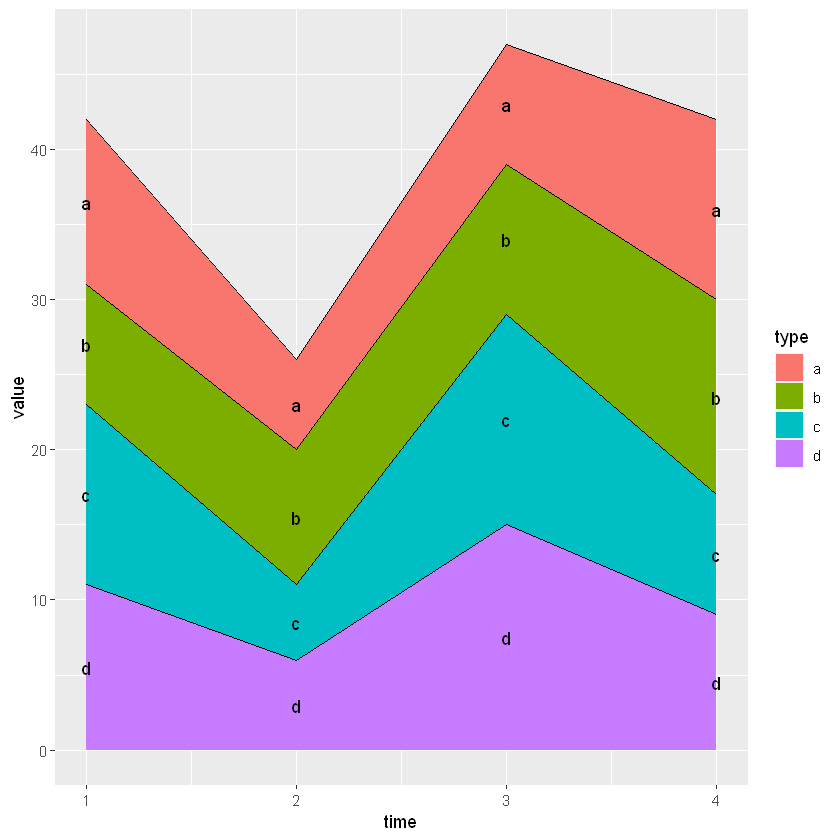

In [38]:
# You can override this with the vjust parameter. A vjust of 0.5
# will center the labels inside the corresponding area
ggplot(series, aes(time, value, group = type)) +
geom_area(aes(fill = type), position = 'stack') +
geom_line(color = 'black', position = 'stack') +
geom_text(aes(label = type), position = position_stack(vjust = .5))